# Community Crime Rate Prediction

## (a) Download the Communities and Crime data
from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
communities_df = pd.read_csv("data/communities.csv", header=None)
#summary_stats.csv is a file copied from the summary statistics part in the data description
summary_stats = pd.read_csv("data/summary_stats.csv", header=None, delimiter="\s+")
feature_names = summary_stats.iloc[:,0].values

#drop non-predictive features
communities_df = communities_df.iloc[:, 5:]
communities_df.columns = feature_names

communities_df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


## (b) Impute the missing value¶

In [10]:
from sklearn.preprocessing import Imputer

communities_df = communities_df.replace('?', np.NaN)
#replace missing values with mean
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
new_arr = imp.fit_transform(communities_df)
new_df2 = pd.DataFrame(new_arr, columns=feature_names)

In [11]:
new_df2

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.05,0.08,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.01,0.33,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.04,0.17,0.04,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.47,0.11,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15


In [12]:
#replace missing values with median
new_df1 = communities_df.fillna(communities_df.median())

## (c) Correlation matrix

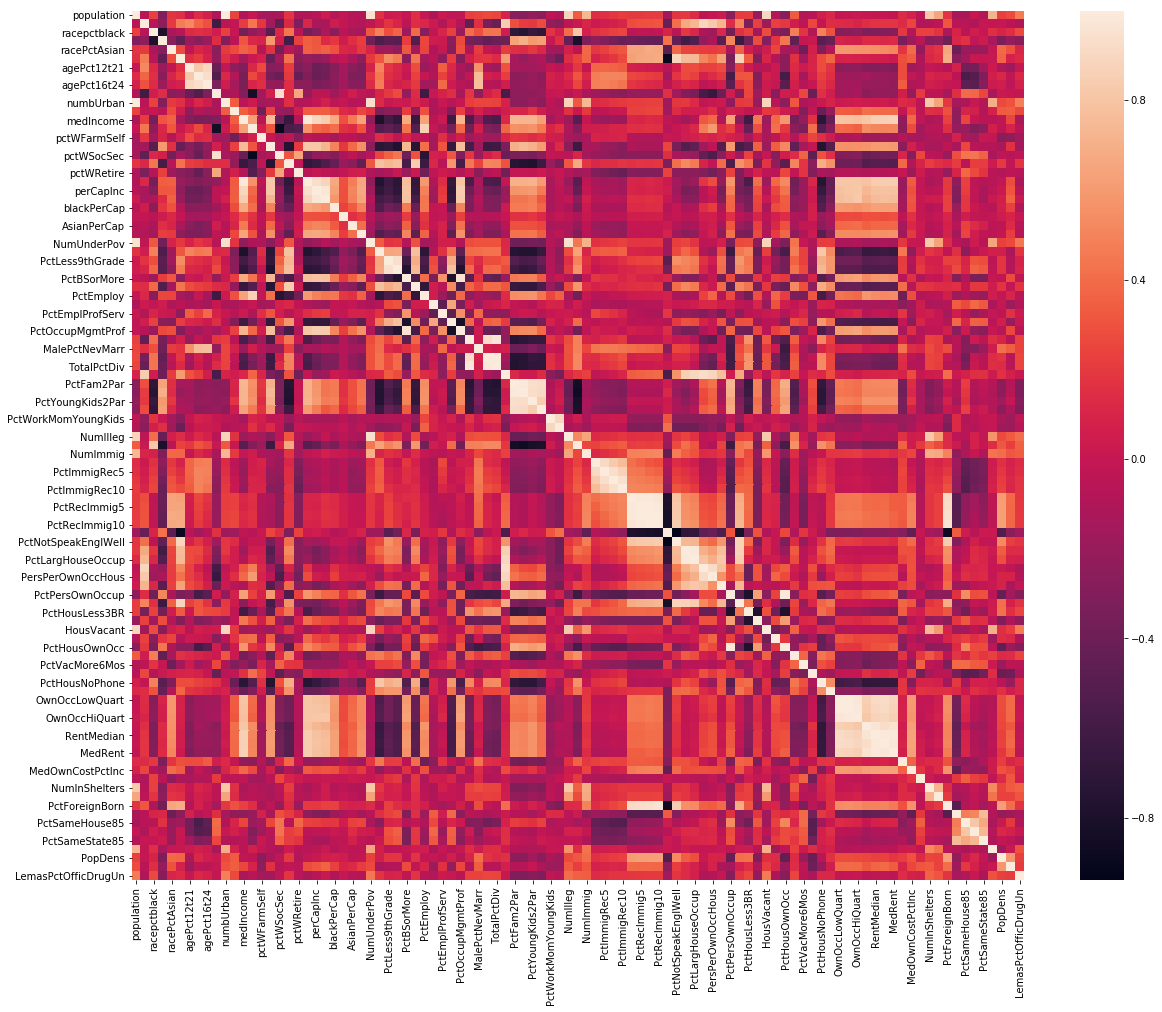

In [13]:
corr_matrix = new_df1.iloc[:,:-1].corr()
# mask = np.array(corr_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix)

## (d) Calculate the Coefficient of Variation CV for each feature

In [14]:
df_stats = new_df2.describe()
coef_variation = df_stats.loc['std'] / df_stats.loc['mean']

In [15]:
print("The Coefficients if Variation of features are:")
print(coef_variation)

The Coefficients if Variation of features are:
population              2.203503
householdsize           0.353298
racepctblack            1.410920
racePctWhite            0.323782
racePctAsian            1.359162
racePctHisp             1.614278
agePct12t21             0.365840
agePct12t29             0.290693
agePct16t24             0.495161
agePct65up              0.423442
numbUrban               2.001744
pctUrban                0.638849
medIncome               0.579753
pctWWage                0.327710
pctWFarmSelf            0.700030
pctWInvInc              0.359240
pctWSocSec              0.368513
pctWPubAsst             0.699031
pctWRetire              0.349639
medFamInc               0.527732
perCapInc               0.545633
whitePerCap             0.507552
blackPerCap             0.589469
indianPerCap            0.809685
AsianPerCap             0.606194
OtherPerCap             0.670645
HispPerCap              0.473960
NumUnderPov             2.304970
PctPopUnderPov          0.753

## (e) pick 11 features with highest CV , and make scatter plots and box plots

In [16]:
highest_CVs = coef_variation.sort_values(ascending=False).head(11)
print("The 11 features with highest CV:\n")
print(highest_CVs)

The 11 features with highest CV:

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
dtype: float64


In [17]:
features_highestCV = highest_CVs.index.values

### scatter plots

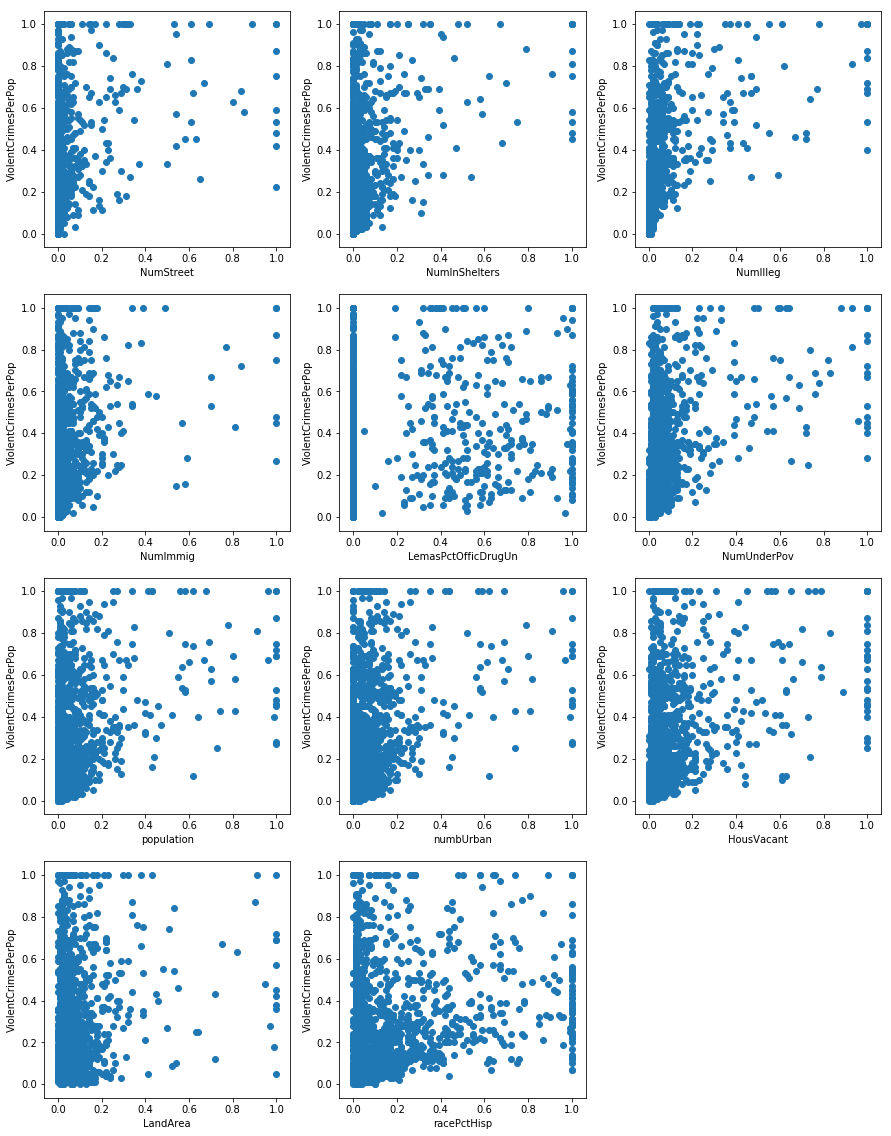

In [18]:
plt.figure(figsize=(15, 20))
for i, ft in enumerate(features_highestCV):
    plt.subplot(4, 3, i + 1)
    plt.scatter(new_df2[ft], new_df2.iloc[:,-1])
    plt.xlabel(ft)
    plt.ylabel('ViolentCrimesPerPop')

I cannot draw conclusions about significance of those features just by the scatter plots.

### box plots

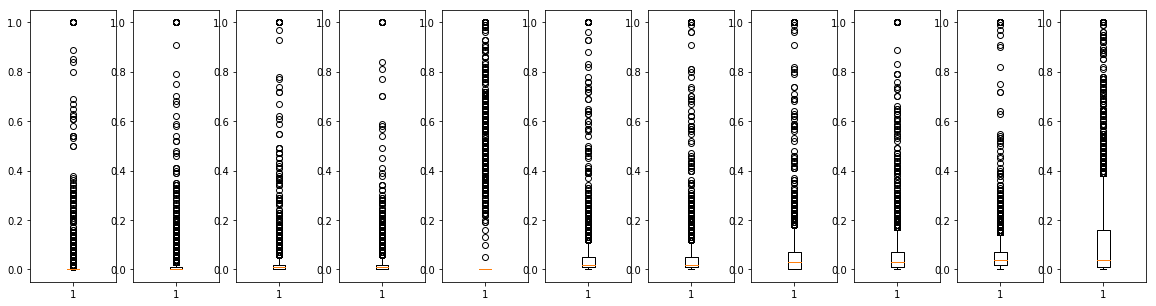

In [19]:
plt.figure(figsize=(20,5))
for i, ft in enumerate(features_highestCV):
    plt.subplot(1, 11, i + 1)
    plt.boxplot(new_df2[ft])

## (f) Linear model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
train = new_df2.head(1495)
test = new_df2.iloc[1495:]

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
test_error = np.mean((y_test - y_pred) ** 2)
print("The test MSE is", test_error)

The test MSE is 0.7897255274575806


/Users/lizi/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


## (g) Ridge Regression

In [23]:
from sklearn.linear_model import RidgeCV, LassoCV

In [24]:
alphas = np.logspace(-5,8,100)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
testMSE = np.mean((y_test - y_pred) ** 2)
print("The test MSE is", testMSE)

The test MSE is 0.017596106371751526


In [25]:
ridge.alpha_

2.4201282647943834

## (h) LASSO

In [26]:
alphas = np.logspace(-4, 2, num=15)
lasso = LassoCV(alphas=alphas, cv=5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
testMSE = np.mean((y_test - y_pred) ** 2)
print("The test MSE is", testMSE)

The test MSE is 0.01779018555193252


In [27]:
selected_ix = np.argwhere(lasso.coef_ != 0).flatten()
selected = feature_names[selected_ix]
print('There are',len(selected),'features selected by LASSO. They are:')
selected.tolist()

There are 78 features selected by LASSO. They are:


['racepctblack',
 'racePctAsian',
 'agePct12t21',
 'agePct12t29',
 'agePct65up',
 'pctUrban',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctBSorMore',
 'PctEmploy',
 'PctEmplManu',
 'PctOccupManu',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRec10',
 'PctRecImmig10',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'MedNumBR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctHousNoPhone',
 'PctWOFullPlumb',
 'OwnOccLowQuart',
 'RentLowQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'Pct

### LASSO with normalized features

In [24]:
lasso = LassoCV(alphas=alphas, normalize=True, cv=5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
testMSE = np.mean((y_test - y_pred) ** 2)
print("The test MSE is", testMSE)
selected_ix = np.argwhere(lasso.coef_ != 0).flatten()
selected = feature_names[selected_ix]
print('There are',len(selected),'features selected by LASSO. They are:')
selected.tolist()

The test MSE is 0.01776904797042259
There are 68 features selected by LASSO. They are:


['racepctblack',
 'agePct12t21',
 'agePct12t29',
 'pctUrban',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctEmploy',
 'PctEmplManu',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRec5',
 'PctRecImmig10',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctWOFullPlumb',
 'RentLowQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'PctForeignBorn',
 'PctSameCity85',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'PolicReqPerOffic',
 'RacialMatchCommPol',
 'PctPolicBlack',
 

As we can see from the two cases above, LASSO results after normalization will be slightly better.

### (i) PCR Model

In [29]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score

In [30]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))

In [31]:
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
regr = LinearRegression()
cv_mse = []

for i in range(1, 123):
    score = cross_val_score(regr, X_train_reduced[:,:i], y_train, cv=kf_10, 
                                 scoring='neg_mean_squared_error')
    cv_mse.append(-1 * score.mean())

Text(0,0.5,'cross-validation MSE')

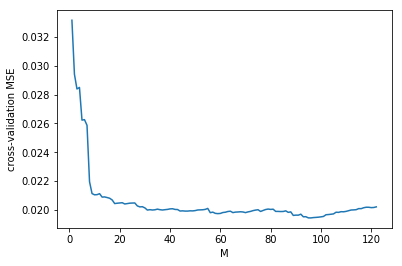

In [32]:
plt.plot(range(1, 123), cv_mse)
plt.xlabel('M')
plt.ylabel('cross-validation MSE')

In [33]:
best_M = np.argmin(cv_mse) + 1
print("The best PCA components number might be", best_M)

The best PCA components number might be 96


In [34]:
regr.fit(X_train_reduced[:,:best_M], y_train)
X_test_reduced = pca.transform(scale(X_test))
y_pred = regr.predict(X_test_reduced[:,:best_M])
testMSE = mean_squared_error(y_test, y_pred)
print("The test MSE is", testMSE)

The test MSE is 0.018773924964279723


## (j) Boosting Tree

In [31]:
from xgboost import XGBRegressor

In [35]:
alpha_vals = np.logspace(-2, 4, 10)

cv_mse = []
for a in alpha_vals:
    xgb = XGBRegressor(reg_alpha=a, n_jobs=1)
    score = cross_val_score(xgb, X_train, y_train, cv=kf_10, scoring='neg_mean_squared_error')
    cv_mse.append(-1 * score.mean())

In [39]:
best_alpha = alpha_vals[np.argmin(cv_mse)]
print('The best value of alpha is', best_alpha)

The best value of alpha is 0.21544346900318834


In [41]:
xgb = XGBRegressor(reg_alpha=best_alpha, n_jobs=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
testMSE = mean_squared_error(y_test, y_pred)
print("The test MSE is", testMSE)

The test MSE is 0.0167888851527195
